### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Loading dataset

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### 3.Data understanding

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### 3.Data Preprocessing

In [4]:
company_data['ShelveLoc'],class_names = pd.factorize(company_data['ShelveLoc'])
company_data.ShelveLoc
print(class_names)

company_data['Urban'],class_names2=pd.factorize(company_data['Urban'])
print(class_names2)

Index(['Bad', 'Good', 'Medium'], dtype='object')
Index(['Yes', 'No'], dtype='object')


In [5]:
company_data['US'].replace(to_replace=['Yes', 'No'],value= ['0', '1'], inplace=True)
company_data.US

0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: object

In [6]:
print(company_data['US'].unique())
company_data.info()

['0' '1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 34.5+ KB


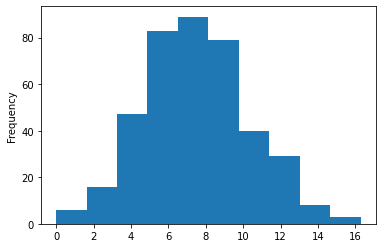

In [7]:
company_data['Sales'].plot.hist()
plt.show()

In [8]:
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
##Converting the Sales column - continuous into categorical

company_data['sales_grp'] = company_data.Sales.map(lambda x: 1 if x>8 else 0)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_grp
0,9.50,138,73,11,276,120,0,42,17,0,0,1
1,11.22,111,48,16,260,83,1,65,10,0,0,1
2,10.06,113,35,10,269,80,2,59,12,0,0,1
3,7.40,117,100,4,466,97,2,55,14,0,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1,0


In [10]:
company_data.drop(['Sales'],axis=1,inplace=True)

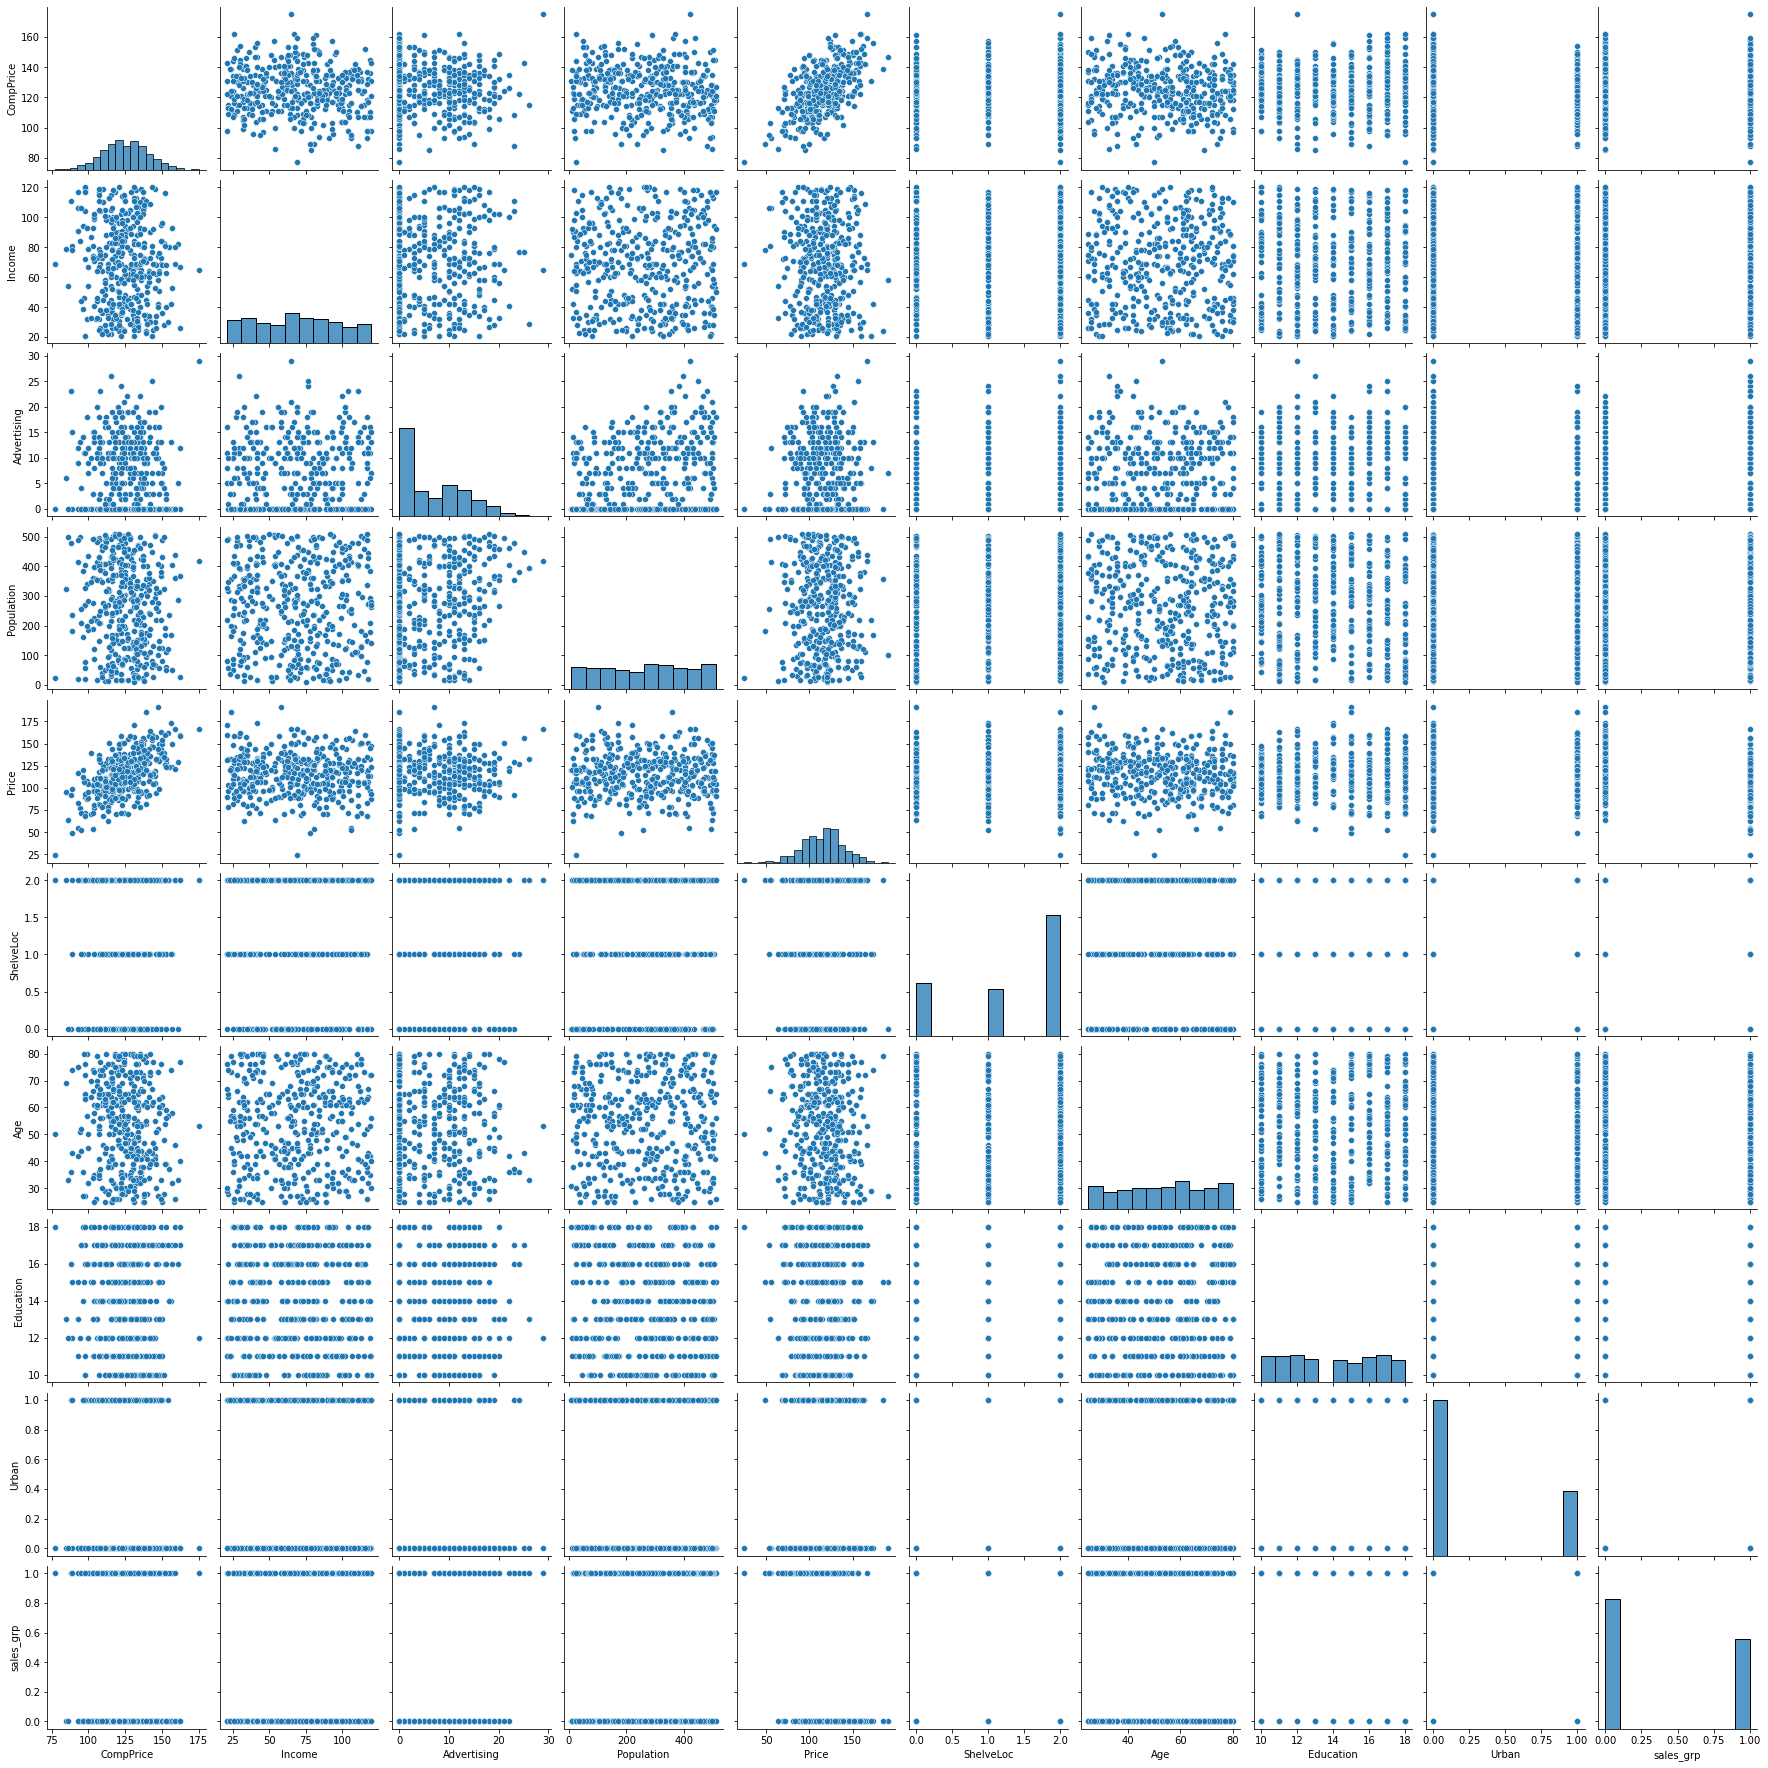

In [11]:
sns.pairplot(company_data)
plt.show()

In [12]:
company_data.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int64
Age             int64
Education       int64
Urban           int64
US             object
sales_grp       int64
dtype: object

In [13]:
x = company_data.drop(['sales_grp'],axis=1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [15]:
y=company_data.sales_grp
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_grp, Length: 400, dtype: int64

In [17]:
##Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=12)

In [18]:
x_train.shape,x_test.shape

((320, 10), (80, 10))

In [19]:
y_train.shape,y_test.shape

((320,), (80,))

### 4. Model Training

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=9,) #Prunning
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

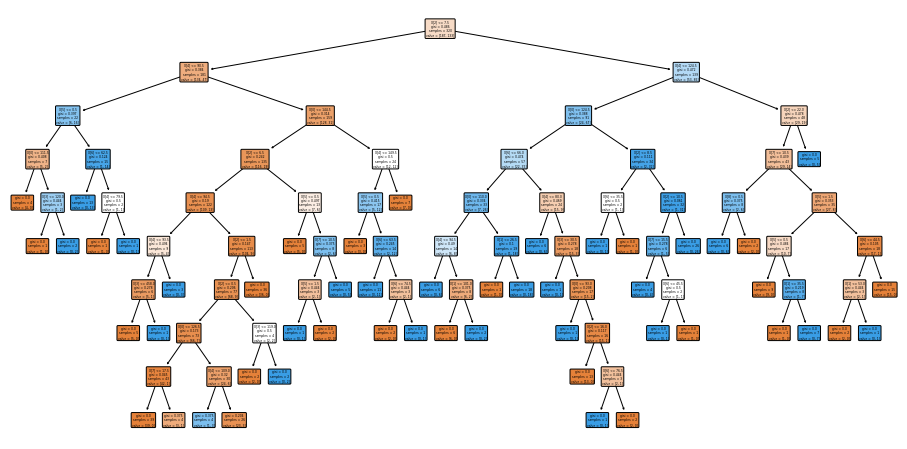

In [36]:
#plotting the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

### 5. Model Testing

In [37]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

### 6.Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

###### Training Data

In [39]:
accuracy_score(y_train,y_pred_train)

0.984375

In [40]:
confusion_matrix(y_train,y_pred_train)

array([[186,   1],
       [  4, 129]], dtype=int64)

In [41]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       187\n           1       0.99      0.97      0.98       133\n\n    accuracy                           0.98       320\n   macro avg       0.99      0.98      0.98       320\nweighted avg       0.98      0.98      0.98       320\n'

###### Testing Data

In [42]:
accuracy_score(y_test,y_pred_test)

0.65

In [43]:
confusion_matrix(y_test,y_pred_test)

array([[34, 15],
       [13, 18]], dtype=int64)

In [44]:
classification_report(y_test,y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.72      0.69      0.71        49\n           1       0.55      0.58      0.56        31\n\n    accuracy                           0.65        80\n   macro avg       0.63      0.64      0.64        80\nweighted avg       0.65      0.65      0.65        80\n'

#### getting the optimum parameters for the given dataset at once

In [31]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator  = dt_model,
                           param_grid = {'criterion': ['gini','entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [33]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [34]:
grid_search.best_score_

0.7649999999999999